In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## a) Asymmetry-based hierarchy

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/connectivity/ec_parc-schaefer400_data-mics/maps/variogram_surrogates_hierarchy_nperm-1000_nparcels-359.npz and have the same parcels

Correlation coefficient


,hierarchy
Layer 1 relative thickness,0.097213
Layer 2 relative thickness,-0.041658
Layer 3 relative thickness,-0.165989
Layer 4 relative thickness,-0.382328
Layer 5 relative thickness,0.234864
Layer 6 relative thickness,0.445059



p-value


,hierarchy
Layer 1 relative thickness,0.050
Layer 2 relative thickness,0.484
Layer 3 relative thickness,0.000
Layer 4 relative thickness,0.000
Layer 5 relative thickness,0.000
Layer 6 relative thickness,0.000


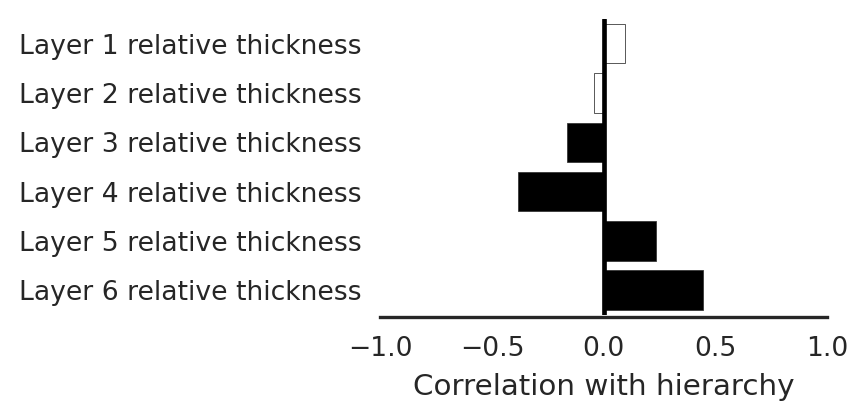

In [2]:
ec_maps = surfaces.EffectiveConnectivityMaps(dataset='mics')
laminar_features = surfaces.LaminarFeatures(parcellation_name='schaefer400', exc_regions='adysgranular')
r, p = ec_maps.correlate(laminar_features, x_columns=['hierarchy'], y_columns=[f'Layer {i} relative thickness' for i in range(1, 7)], regplot=False)
print("\nCorrelation coefficient")
display(r)
print("\np-value")
display(p)

## b) Macaque's laminar-based hierarchy

Calculating correlations with variogram test (parcellated)
Surrogates already exist in /home/asaberi/laminar_organization/code/../output/macaque_hierarchy/variogram_surrogates_Laminar-based hierarchy_nperm-1000_nparcels-91.npz and have the same parcels

Correlation coefficient


,Laminar-based hierarchy
Layer 1 relative thickness,0.246054
Layer 2 relative thickness,-0.103637
Layer 3 relative thickness,-0.312160
Layer 4 relative thickness,-0.594074
Layer 5 relative thickness,0.494473
Layer 6 relative thickness,0.677970



p-value


,Laminar-based hierarchy
Layer 1 relative thickness,0.081
Layer 2 relative thickness,0.368
Layer 3 relative thickness,0.001
Layer 4 relative thickness,0.000
Layer 5 relative thickness,0.000
Layer 6 relative thickness,0.000


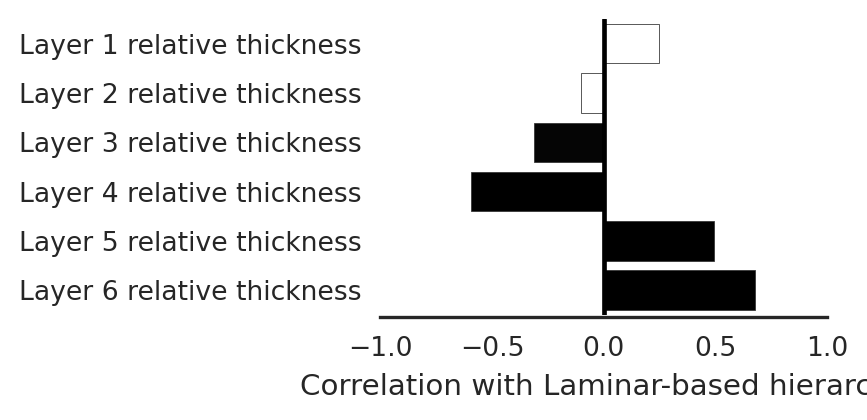

In [3]:
macaque_laminar_thickness = surfaces.MacaqueSurface(laminar_features, [f'Layer {i} relative thickness' for i in range(1, 7)])
macaque_hierarchy = surfaces.MacaqueHierarchy()
r, p = macaque_hierarchy.correlate(macaque_laminar_thickness, regplot=False)
print("\nCorrelation coefficient")
display(r)
print("\np-value")
display(p)